<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Curva-precision-recall" data-toc-modified-id="Curva-precision-recall-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Curva precision-recall</a></span></li><li><span><a href="#Curva-ROC" data-toc-modified-id="Curva-ROC-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Curva ROC</a></span></li></ul></div>

# Curva precision-recall

Precision-Recall es una medida útil del éxito de la predicción cuando las clases están muy desequilibradas. La precisión (precision) es una medida de la relevancia de los resultados, mientras que la recuperación (recall) es una medida de cuántos resultados verdaderamente relevantes se devuelven.

La curva precision-recall muestra el equilibrio entre precisión y recuperación para diferentes umbrales. **Un área grande debajo de la curva representa tanto un alto recall como una alta precisión**, donde la alta precisión se relaciona con una tasa baja de falsos positivos y el alto recall se relaciona con una baja tasa de falsos negativos. Las puntuaciones altas para ambas métricas muestran que el clasificador está arrojando resultados precisos (alta precisión), así como también arroja la mayoría de todos los resultados positivos (alto recall).

- Un sistema con alto recall pero baja precisión arroja muchos resultados, pero la mayoría de las etiquetas predichas son incorrectas en comparación con las etiquetas de entrenamiento. 
- Un sistema con alta precisión pero poco recall es todo lo contrario, arrojando muy pocos resultados, pero la mayoría de las etiquetas predichas son correctas en comparación con las etiquetas de entrenamiento. 
- Un sistema ideal con alta precisión y alto recall devolverá muchos resultados, con todos los resultados etiquetados correctamente.

Esta curva se utiliza normalmente en la clasificación binaria para estudiar la salida de un clasificador. Para extender la curva precision-recall a la clasificación de múltiples clases o etiquetas, es necesario binarizar la salida. Se puede dibujar una curva por etiqueta, pero también se puede dibujar una curva considerando cada elemento de la matriz del indicador de etiqueta como una predicción binaria (micropromedio).

In [2]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
X.shape

(150, 4)

In [8]:
# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [9]:
# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

In [10]:
# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

In [12]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.88


In [11]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.88')

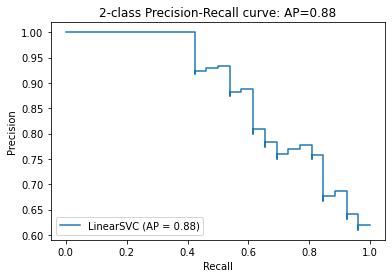

In [13]:
disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# Curva ROC

Las curvas ROC suelen presentar una tasa de verdaderos positivos en el eje Y y una tasa de falsos positivos en el eje X. Esto significa que la esquina superior izquierda de la gráfica es el punto "ideal": una tasa de falsos positivos de cero y una tasa de verdaderos positivos de uno. Esto no es muy realista, pero significa que un área más grande bajo la curva (AUC) suele ser mejor.

Las curvas ROC se utilizan normalmente en la clasificación binaria. Para extender la curva ROC y el área ROC a la clasificación de etiquetas múltiples, es necesario binarizar la salida. Se puede dibujar una curva ROC por etiqueta, pero también se puede dibujar una curva ROC considerando cada elemento de la matriz del indicador de etiqueta como una predicción binaria (micropromedio).

In [25]:
import numpy as np
import matplotlib.pyplot as plt
#from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
#from scipy import interp
from sklearn.metrics import roc_auc_score

In [26]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [27]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])

In [29]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [30]:
y.shape

(150, 3)

In [31]:
n_classes = y.shape[1]
n_classes

3

In [ ]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [32]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

In [33]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [38]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [39]:
fpr

{0: array([0., 0., 0., 1.]),
 1: array([0.        , 0.        , 0.02222222, 0.02222222, 0.04444444,
        0.04444444, 0.06666667, 0.06666667, 0.11111111, 0.11111111,
        0.2       , 0.2       , 0.31111111, 0.31111111, 0.33333333,
        0.33333333, 0.35555556, 0.35555556, 0.4       , 0.4       ,
        0.51111111, 0.51111111, 0.55555556, 0.55555556, 0.57777778,
        0.57777778, 0.62222222, 0.62222222, 0.64444444, 0.64444444,
        0.66666667, 0.66666667, 1.        ]),
 2: array([0.        , 0.        , 0.        , 0.01960784, 0.01960784,
        0.03921569, 0.03921569, 1.        ])}

In [40]:
tpr

{0: array([0.        , 0.04761905, 1.        , 1.        ]),
 1: array([0.        , 0.03333333, 0.03333333, 0.1       , 0.1       ,
        0.2       , 0.2       , 0.23333333, 0.23333333, 0.36666667,
        0.36666667, 0.4       , 0.4       , 0.7       , 0.7       ,
        0.73333333, 0.73333333, 0.76666667, 0.76666667, 0.8       ,
        0.8       , 0.83333333, 0.83333333, 0.86666667, 0.86666667,
        0.9       , 0.9       , 0.93333333, 0.93333333, 0.96666667,
        0.96666667, 1.        , 1.        ]),
 2: array([0.        , 0.04166667, 0.79166667, 0.79166667, 0.95833333,
        0.95833333, 1.        , 1.        ])}

In [41]:
roc_auc

{0: 1.0, 1: 0.7214814814814815, 2: 0.9950980392156863}

In [42]:
y_test.ravel()

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0])

In [43]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [45]:
fpr

{0: array([0., 0., 0., 1.]),
 1: array([0.        , 0.        , 0.02222222, 0.02222222, 0.04444444,
        0.04444444, 0.06666667, 0.06666667, 0.11111111, 0.11111111,
        0.2       , 0.2       , 0.31111111, 0.31111111, 0.33333333,
        0.33333333, 0.35555556, 0.35555556, 0.4       , 0.4       ,
        0.51111111, 0.51111111, 0.55555556, 0.55555556, 0.57777778,
        0.57777778, 0.62222222, 0.62222222, 0.64444444, 0.64444444,
        0.66666667, 0.66666667, 1.        ]),
 2: array([0.        , 0.        , 0.        , 0.01960784, 0.01960784,
        0.03921569, 0.03921569, 1.        ]),
 'micro': array([0.        , 0.        , 0.        , 0.00666667, 0.00666667,
        0.01333333, 0.01333333, 0.02      , 0.02      , 0.04      ,
        0.04      , 0.05333333, 0.05333333, 0.08666667, 0.08666667,
        0.14      , 0.14      , 0.16      , 0.16      , 0.16666667,
        0.16666667, 0.17333333, 0.17333333, 0.19333333, 0.19333333,
        0.22      , 0.22      , 0.28      , 0.28

In [44]:
fpr[2]

array([0.        , 0.        , 0.        , 0.01960784, 0.01960784,
       0.03921569, 0.03921569, 1.        ])

In [47]:
tpr

{0: array([0.        , 0.04761905, 1.        , 1.        ]),
 1: array([0.        , 0.03333333, 0.03333333, 0.1       , 0.1       ,
        0.2       , 0.2       , 0.23333333, 0.23333333, 0.36666667,
        0.36666667, 0.4       , 0.4       , 0.7       , 0.7       ,
        0.73333333, 0.73333333, 0.76666667, 0.76666667, 0.8       ,
        0.8       , 0.83333333, 0.83333333, 0.86666667, 0.86666667,
        0.9       , 0.9       , 0.93333333, 0.93333333, 0.96666667,
        0.96666667, 1.        , 1.        ]),
 2: array([0.        , 0.04166667, 0.79166667, 0.79166667, 0.95833333,
        0.95833333, 1.        , 1.        ]),
 'micro': array([0.        , 0.01333333, 0.33333333, 0.33333333, 0.54666667,
        0.54666667, 0.6       , 0.6       , 0.62666667, 0.62666667,
        0.73333333, 0.73333333, 0.74666667, 0.74666667, 0.76      ,
        0.76      , 0.82666667, 0.82666667, 0.86666667, 0.86666667,
        0.88      , 0.88      , 0.89333333, 0.89333333, 0.90666667,
        0.906666

In [46]:
tpr[2]

array([0.        , 0.04166667, 0.79166667, 0.79166667, 0.95833333,
       0.95833333, 1.        , 1.        ])

In [48]:
roc_auc

{0: 1.0,
 1: 0.7214814814814815,
 2: 0.9950980392156863,
 'micro': 0.9390222222222223}

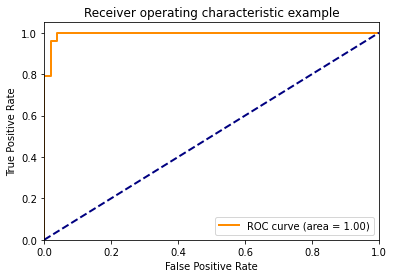

In [49]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


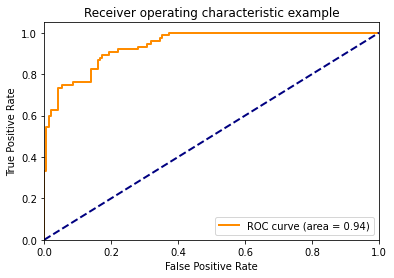

In [50]:
plt.figure()
lw = 2
plt.plot(fpr['micro'], tpr['micro'], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()